In [ ]:
# Import other necessary libraries
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2


In [ ]:

# Load and preprocess the image data
def defective_load_data(directory, image_size):
    data = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(directory, filename))
            img_resized = cv2.resize(img, image_size)
            img_normalized = img_resized / 255.0
            data.append(img_normalized)

            label = 0
            labels.append(label)

    return np.array(data), np.array(labels)

In [ ]:
def non_defective_load_data(directory, image_size):
    data = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(directory, filename))
            img_resized = cv2.resize(img, image_size)
            img_normalized = img_resized / 255.0
            data.append(img_normalized)

            label = 1
            labels.append(label)

    return np.array(data), np.array(labels)

In [ ]:
defective_directory = "/content/drive/MyDrive/3d printing data set/defected"
non_defective_directory = "/content/drive/MyDrive/3d printing data set/no_defected"

In [ ]:
# Load and preprocess the data
defective_data, defective_labels = defective_load_data(defective_directory, (128, 128))

In [ ]:
non_defective_data, non_defective_labels = non_defective_load_data(non_defective_directory, (128, 128))

In [ ]:
defective_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
non_defective_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Combine the defective and non-defective data and labels
data = np.concatenate((defective_data, non_defective_data), axis=0)
labels = np.concatenate((defective_labels, non_defective_labels), axis=0)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
from tensorflow import keras
from keras.optimizers import Adam


# Define the CNN model with additional layers and components
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with an appropriate optimizer and learning rate
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model with augmented data
datagen.fit(data)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train the model with the train and validation sets
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=10,
          validation_data=(X_val, y_val))

Epoch 1/10
39/39 [==============================] - 19s 140ms/step - loss: 2.5431 - accuracy: 0.5912 - val_loss: 1.0584 - val_accuracy: 0.5000
Epoch 2/10
39/39 [==============================] - 7s 182ms/step - loss: 0.6627 - accuracy: 0.6859 - val_loss: 8.9662 - val_accuracy: 0.5128
Epoch 3/10
39/39 [==============================] - 5s 129ms/step - loss: 0.5073 - accuracy: 0.7414 - val_loss: 16.8428 - val_accuracy: 0.5128
Epoch 4/10
39/39 [==============================] - 5s 138ms/step - loss: 0.4982 - accuracy: 0.7502 - val_loss: 14.5561 - val_accuracy: 0.5128
Epoch 5/10
39/39 [==============================] - 5s 128ms/step - loss: 0.4666 - accuracy: 0.7719 - val_loss: 15.7769 - val_accuracy: 0.5128
Epoch 6/10
39/39 [==============================] - 7s 183ms/step - loss: 0.4589 - accuracy: 0.7751 - val_loss: 20.8024 - val_accuracy: 0.5128
Epoch 7/10
39/39 [==============================] - 5s 128ms/step - loss: 0.4030 - accuracy: 0.7912 - val_loss: 13.9199 - val_accuracy: 0.5128


In [ ]:
# Adjust batch size and epochs
model.fit(datagen.flow(X_train, y_train, batch_size=64),
          epochs=15,
          validation_data=(X_val, y_val))

Epoch 1/15
20/20 [==============================] - 5s 231ms/step - loss: 0.2871 - accuracy: 0.8643 - val_loss: 2.6368 - val_accuracy: 0.5128
Epoch 2/15
20/20 [==============================] - 7s 354ms/step - loss: 0.2501 - accuracy: 0.8779 - val_loss: 2.1180 - val_accuracy: 0.5160
Epoch 3/15
20/20 [==============================] - 5s 241ms/step - loss: 0.2354 - accuracy: 0.8795 - val_loss: 4.2151 - val_accuracy: 0.5128
Epoch 4/15
20/20 [==============================] - 7s 340ms/step - loss: 0.2383 - accuracy: 0.8876 - val_loss: 1.9511 - val_accuracy: 0.6250
Epoch 5/15
20/20 [==============================] - 6s 279ms/step - loss: 0.2175 - accuracy: 0.9068 - val_loss: 8.1293 - val_accuracy: 0.5128
Epoch 6/15
20/20 [==============================] - 5s 242ms/step - loss: 0.2087 - accuracy: 0.9100 - val_loss: 6.0458 - val_accuracy: 0.5128
Epoch 7/15
20/20 [==============================] - 7s 354ms/step - loss: 0.1909 - accuracy: 0.9084 - val_loss: 6.3942 - val_accuracy: 0.5128
Epoch 

In [ ]:
# Adjust batch size and epochs
model.fit(datagen.flow(X_train, y_train, batch_size=64),
          epochs=15,
          validation_data=(X_val, y_val))

Epoch 1/15
20/20 [==============================] - 5s 219ms/step - loss: 0.2060 - accuracy: 0.9052 - val_loss: 6.1253 - val_accuracy: 0.5128
Epoch 2/15
20/20 [==============================] - 6s 320ms/step - loss: 0.1723 - accuracy: 0.9253 - val_loss: 8.7823 - val_accuracy: 0.5128
Epoch 3/15
20/20 [==============================] - 5s 230ms/step - loss: 0.1387 - accuracy: 0.9382 - val_loss: 6.2491 - val_accuracy: 0.5128
Epoch 4/15
20/20 [==============================] - 5s 231ms/step - loss: 0.1325 - accuracy: 0.9486 - val_loss: 3.5924 - val_accuracy: 0.5321
Epoch 5/15
20/20 [==============================] - 6s 296ms/step - loss: 0.1286 - accuracy: 0.9438 - val_loss: 3.0290 - val_accuracy: 0.6122
Epoch 6/15
20/20 [==============================] - 5s 244ms/step - loss: 0.1591 - accuracy: 0.9309 - val_loss: 0.5165 - val_accuracy: 0.7917
Epoch 7/15
20/20 [==============================] - 7s 328ms/step - loss: 0.1225 - accuracy: 0.9494 - val_loss: 0.4381 - val_accuracy: 0.8045
Epoch 

In [ ]:
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the saved model
saved_model = keras.models.load_model('trained_model.h5')

In [ ]:
saved_model

In [ ]:
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
import os
import random
import numpy as np
import cv2
from tensorflow import keras

In [ ]:
# Define the directories
defective_directory = "/content/drive/MyDrive/3d printing data set/defected"
non_defective_directory = "/content/drive/MyDrive/3d printing data set/no_defected"

In [1]:
# Define the Q-learning agent
class DQNAgent:
    def __init__(self):
        self.learning_rate = 0.1
        self.discount_factor = 0.9
        self.epsilon = 0.1  # exploration vs exploitation factor
        self.q_values = {}  # stores Q values for each state-action pair

    def get_action(self, state, actions):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(actions)  # Explore: select a random action
        else:
            return max(actions, key=lambda a: self.q_values.get((state, a), 0))  # Exploit: select the action with the highest Q value for this state

    def learn(self, state, action, reward, next_state, done):
        if not done:
            best_next_action = max(actions, key=lambda a: self.q_values.get((next_state, a), 0))  # Q-learning update rule
            self.q_values[(state, action)] = self.q_values.get((state, action), 0) + self.learning_rate * (
                        reward + self.discount_factor * self.q_values.get((next_state, best_next_action), 0) - self.q_values.get((state, action), 0))
        else:
            self.q_values[(state, action)] = self.q_values.get((state, action), 0) + self.learning_rate * (reward - self.q_values.get((state, action), 0))

In [ ]:
# Define the actions
actions = ['defective', 'non_defective']

In [ ]:
# Define the agent
agent = DQNAgent()

In [ ]:
import matplotlib.pyplot as plt


1/1 [==============================] - 0s 22ms/step
The image bed_not_stick_26.jpg is classified as non-defective.


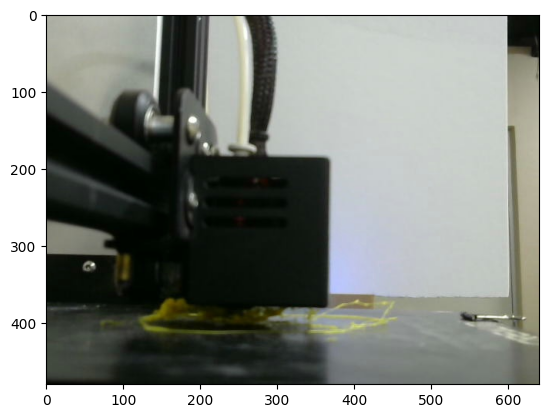

1/1 [==============================] - 0s 19ms/step
The image scratch_48.jpg is classified as non-defective.


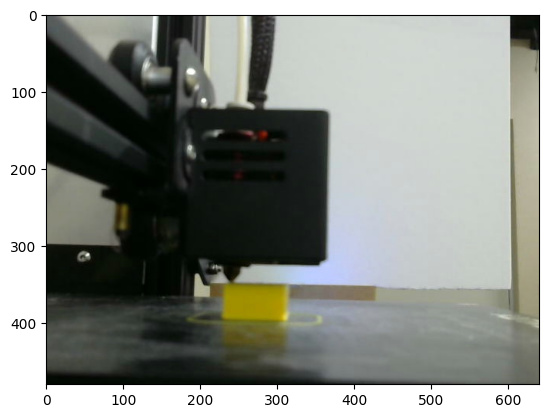

1/1 [==============================] - 0s 21ms/step
The image no_support_151.jpg is classified as non-defective.


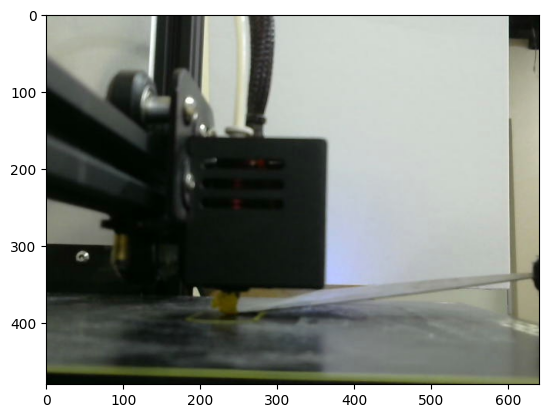

1/1 [==============================] - 0s 19ms/step
The image leg_broken_52.jpg is classified as non-defective.


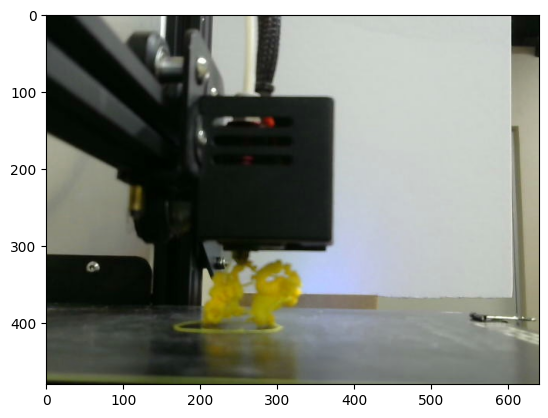

1/1 [==============================] - 0s 17ms/step
The image no_support_171.jpg is classified as non-defective.


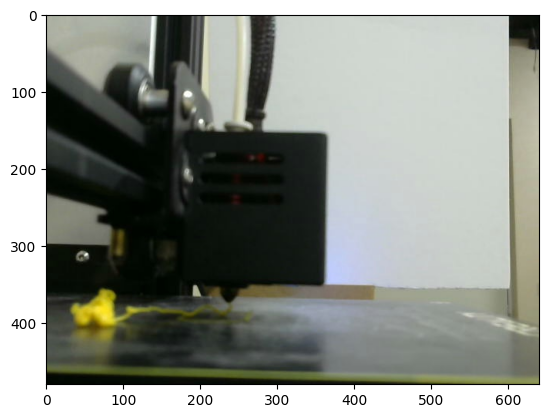

1/1 [==============================] - 0s 18ms/step
The image scratch_4_36.jpg is classified as defective. alaram activated


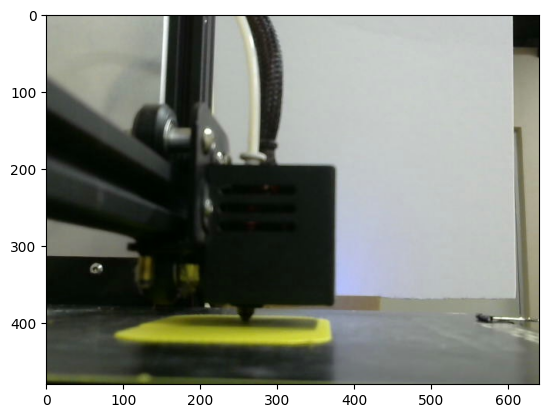

1/1 [==============================] - 0s 17ms/step
The image no_bottom_32.jpg is classified as non-defective.


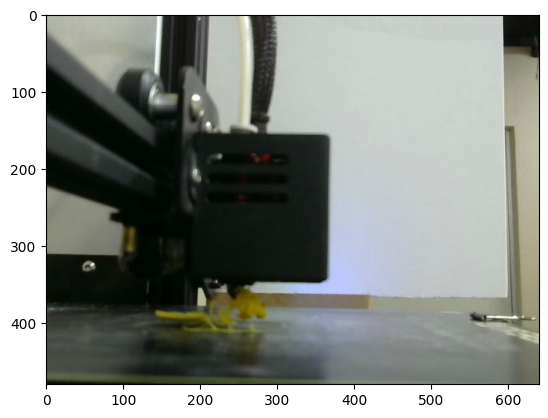

1/1 [==============================] - 0s 17ms/step
The image scratch_4_73.jpg is classified as non-defective.


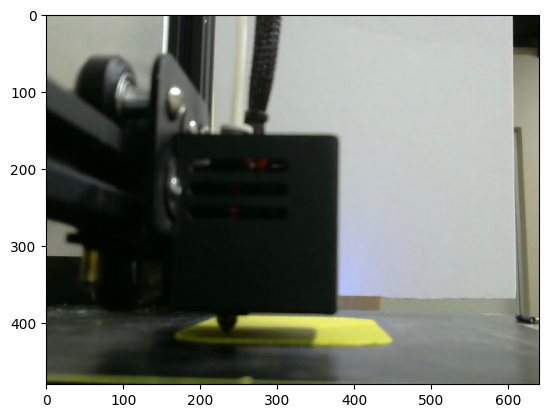

1/1 [==============================] - 0s 38ms/step
The image scratch_2_167.jpg is classified as non-defective.


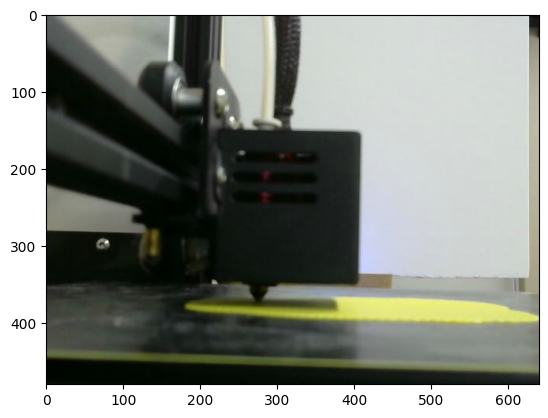

1/1 [==============================] - 0s 42ms/step
The image leg_broken_68.jpg is classified as non-defective.


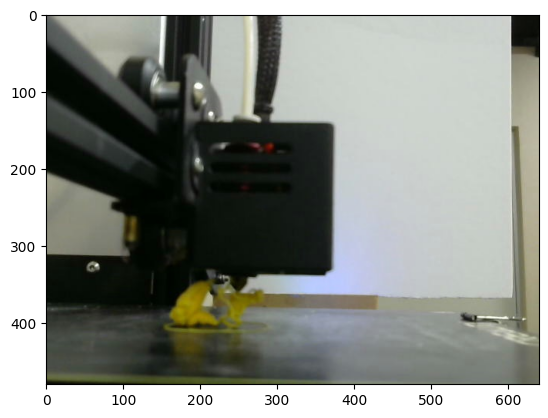

In [ ]:
# Run the simulation and training
EPISODES = 10
for episode in range(EPISODES):
    # Randomly select an image
    if random.uniform(0, 1) < 0.5:
        state = random.choice(os.listdir(defective_directory))
    else:
        state = random.choice(os.listdir(non_defective_directory))

    # Load and preprocess the image
    img = cv2.imread(os.path.join(defective_directory, state)) if state in os.listdir(defective_directory) else cv2.imread(os.path.join(non_defective_directory, state))
    img_resized = cv2.resize(img, (128, 128))
    img_normalized = img_resized / 255.0

    # Perform image classification
    prediction = saved_model.predict(np.expand_dims(img_normalized, axis=0))
    if prediction < 0.5:
        action = 'non_defective'
        print(f"The image {state} is classified as non-defective.")
    else:
        action = 'defective'
        print(f"The image {state} is classified as defective. alaram activated")

        # Implement the logic for rewards and next state
    if action == 'defective' and state in os.listdir(defective_directory):
        reward = 1
        next_state = random.choice(os.listdir(defective_directory))
    elif action == 'non_defective' and state in os.listdir(non_defective_directory):
        reward = 1
        next_state = random.choice(os.listdir(non_defective_directory))
    # else:
    #     reward = -1
    #     next_state = random.choice(os.listdir("/content/drive/MyDrive/3d printing data set"))

    done = False  # Define when the episode is complete


    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    # Implement the agent learning process
    agent.learn(state, action, reward, next_state, done)